<a href="https://colab.research.google.com/github/deboraaires/analise_Ibovespa/blob/main/An%C3%A1lise_do_IBOVESPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigação do comportamento do IBOVESPA de 28/04/1993 a 19/11/2020.**

Fonte de dados: 

https://finance.yahoo.com/quote/%5EBVSP/history?period1=735955200&period2=1605916800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true





Crises econômico-financeiras:

*   https://www.bndes.gov.br/SiteBNDES/export/sites/default/bndes_pt/Galerias/Arquivos/conhecimento/td/Td-77.pdf
*   https://www.infoescola.com/economia/crises-economico-financeiras-de-1991-a-2011/
*   https://en.wikipedia.org/wiki/Financial_crisis


*   1992–93 – Black Wednesday – speculative attacks on currencies in the European Exchange Rate Mechanism
*   1994–95 – Mexico Economic crisis in Mexico – speculative attack and default on Mexican debt
*   1997–98 – 1997 Asian Financial Crisis – devaluations and banking crises across Asia
*   1998 - Russia Russian financial crisis
*   2000–2001 – Turkey 2001 Turkish economic crisis
*   2000 – early 2000s recession
*   1999-2002 – Argentina Argentine economic crisis (1999-2002)
*   2001 – Bursting of dot-com bubble – speculations concerning internet companies crashed
*   2008-2011 – Iceland Icelandic financial crisis
*   2007–08 – financial crisis of 2007–2008
*   2008-2014 Spain 2008-2014 Spanish financial crisis
*   2010 European sovereign debt crisis
*   2014 - Russia Russian financial crisis
*   2010-2018 - Greece Greek government-debt crisis
*   2018–present - Turkey Turkish currency and debt crisis, 2018
*   2020–present - 2020 stock market crash (especially the Black Monday and the Black Thursday)


In [57]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
#Importação de dados

url = 'https://raw.githubusercontent.com/deboraaires/analise_Ibovespa/main/%5EBVSP.csv'

#Criando um DataFrame em ibovespa
ibovespa = pd.read_csv(url,
                    sep=",",
                    decimal=".",
                    engine='python')

#Visualização das 5 primeiras linhas
ibovespa.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
1,1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
2,1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
3,1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0
4,1993-05-04,24.100000,25.000000,24.100000,24.900000,24.900000,0.0


In [59]:
#remove valores nulos do conjunto de dados
ibovespa = ibovespa.loc[~ibovespa["Adj Close"].isnull()]

# set_index() seleciona uma coluna para ser o índice do DataFrame
ibovespa = ibovespa.set_index("Date")
ibovespa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0
1993-05-04,24.100000,25.000000,24.100000,24.900000,24.900000,0.0


## Visão do período completo

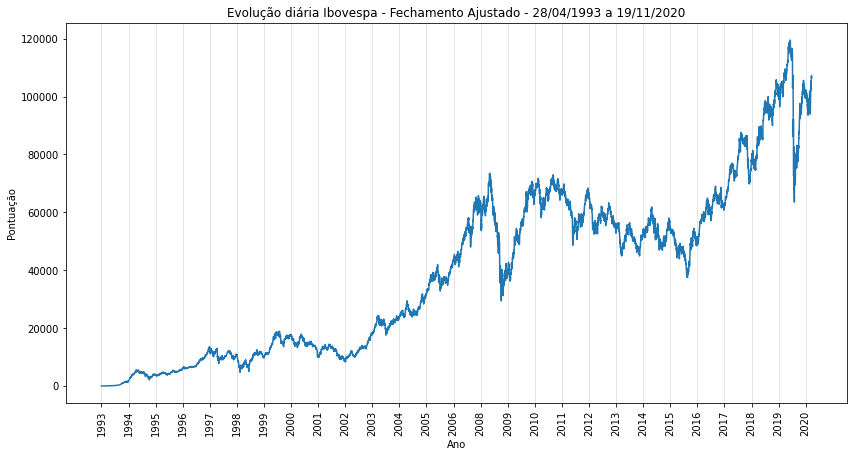

In [60]:


# Visão do período completo
ax = ibovespa["Adj Close"].plot(figsize=(14,7));
plt.title("Evolução diária Ibovespa - Fechamento Ajustado - 28/04/1993 a 19/11/2020");
plt.xlabel("Ano");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.index.str[:4]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 260));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 260)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)


## 1994-1995: Crise econômica do México de 1994

Notícias da época:
*  https://www1.folha.uol.com.br/fsp/1995/11/19/dinheiro/1.html
*  https://pt.wikipedia.org/wiki/Crise_econ%C3%B4mica_do_M%C3%A9xico_de_1994

"Assim, mesmo com todas as proteções garantidas pelo Estado mexicano, os investidores estrangeiros debandavam gradualmente, e assim, os US 25 bilhões de reservas cambiais em moedas fortes que o país possuía no início de 1994 passava, em outubro, para um montante de US 18 bilhões. Mesmo com os tesobonos, as reservas mexicanas diminuíram em mais de um terço de março e setembro. Num esforço desesperado para defender a taxa de câmbio, a administração Salinas esvaziou as reservas de moeda estrangeira, de US 30 bilhões para apenas US 6 bilhões no final de 1994.
Em 20 de dezembro de 1994, apenas três semanas após o início do governo Ernesto Zedillo, o Ministério da Fazenda ampliou a banda cambial em 15,3%. Os investidores entraram em pânico e iniciaram uma corrida ao peso, no dia seguinte, a peg (paridade) foi abandonada e o peso flutuou livremente em relação ao dólar. O valor do peso imediatamente à metade de seu valor nominal, mergulhou o México numa depressão surpreendentemente profunda.
Uma depressão que fez com que em todo o mundo caíssem as cotações dos títulos dos países emergentes."

*  http://memorialdademocracia.com.br/card/crise-do-mexico-traz-impactos-ao-brasil

"A crise teve motivações políticas, como a sucessão presidencial, o assassinato do candidato Luis Colosio e o crescimento das forças zapatistas, mas deveu-se principalmente a fortes desequilíbrios econômicos: déficit na balança de pagamentos, especulação financeira e fuga de capitais.

O atrelamento do peso ao dólar pelo governo Salinas estimulou as importações, produzindo um déficit brutal na balança de pagamentos e a quebra de boa parte da indústria mexicana. Dependendo cada vez mais dos capitais externos e voláteis, o governo mexicano passou a emitir títulos públicos atrelados ao dólar, o que comprometeu gravemente as reservas cambiais."

"A crise econômica do México estoura no final de dezembro de 1994 e agrava-se em janeiro de 1995, afetando outros países da América Latina, inclusive o Brasil, onde o governo do presidente Fernando Henrique Cardoso estava se iniciando."

"Por seu efeito contaminador, a crise mexicana ficou conhecida como Efeito Tequila. Produziu uma desvalorização generalizada dos títulos de países emergentes, especialmente dos latino-americanos."

"o Brasil elevou os juros a estratosféricos 38,7% no ano para atrair e manter os capitais voláteis. "

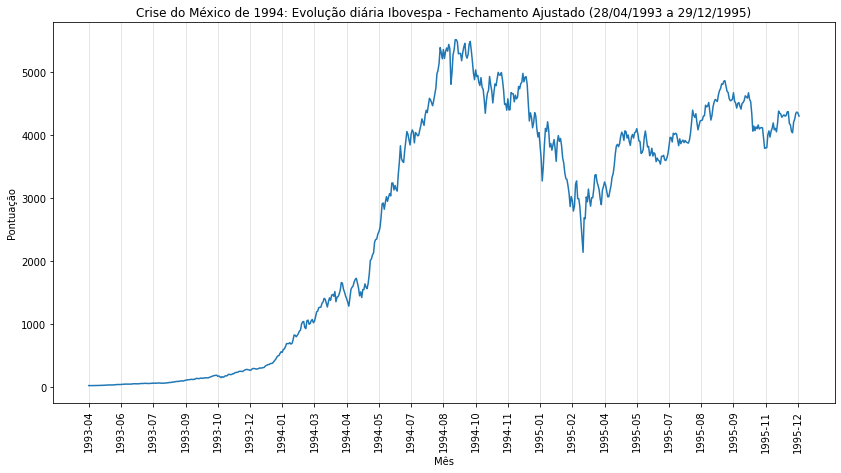

In [61]:
# Visão de 28/04/1993 a 29/12/1995
ax = ibovespa["Adj Close"].loc[:"1995-12-29"].plot(figsize=(14,7));
plt.title("Crise do México de 1994: Evolução diária Ibovespa - Fechamento Ajustado (28/04/1993 a 29/12/1995)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias no label deixando somente mese-ano
labels = ibovespa.index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)


## 1997-1998: Crise Financeira Asiática e Russa

### 1997-1998: Crise Financeira Asiática

Notícias da época:
*   https://pt.wikipedia.org/wiki/Crise_financeira_asi%C3%A1tica_de_1997

"A crise financeira asiática de 1997 foi um período de crise financeira que atingiu grande parte do Sudeste e Oriente asiático a partir de julho de 1997 e levou temores de um colapso econômico mundial devido ao contágio financeiro."

"Os efeitos da crise duraram até 1998."

"Em 1999, porém, os analistas viram sinais de que as economias da Ásia estavam começando a se recuperar."

*   https://en.wikipedia.org/wiki/1997_Asian_financial_crisis
*   https://www.sunoresearch.com.br/artigos/crise-asiatica/

"Em 1997, países do Sudeste e Nordeste asiático enfrentaram crise financeira que desvalorizou fortemente suas moedas, derrubou suas Bolsas de Valores, interrompeu o crescimento econômico e se estendeu ao plano político, com a queda de governos."

"Iniciando-se na Tailândia, na Malásia, na Indonésia e nas Filipinas, suas repercussões adquiriram amplitude global quando incorporou Coréia do Sul e Hong Kong. Uma das causas da crise de confiança foi o endividamento excessivo do setor privado e a incapacidade do setor financeiro de recuperar boa parte dos empréstimos concedidos."

"Brasil

Nos anos 90, no Brasil, as autoridades monetárias deixaram entrar crescentes quantias de capital estrangeiro sem controle, o que aumentou o endividamento externo do país. O déficit em transações correntes era considerado elevado: 3,74% do PIB, o que indicava dependência em relação aos capitais estrangeiros e vulnerabilidade a crises internacionais.
O ataque especulativo levou a um aumento das taxas de juros e de desemprego. A fuga de capitais e a ameaça de colapso cambial, em fins de 1998, levaram o país a emprestar US$ 40 bilhões do FMI para restabelecer o financiamento externo.
O Banco Central interveio nos mercados futuros de dólar para tentar defender o câmbio, gastando reais. Na primeira vez, deu certo. Mas, após a crise da Rússia, em 1998, a tentativa de operar o mercado de câmbio falhou e o país perdeu recursos."

*   https://www1.folha.uol.com.br/fsp/dinheiro/fi2012200604.htm#:~:text=Em%201997%2C%20crise%20na%20%C3%81sia%20atingiu%20emergentes,-DA%20REDA%C3%87%C3%83O&text=Nos%20anos%20seguintes%2C%20contaminou%20outros,financeiros%20das%20economias%20da%20regi%C3%A3o.


"Inicialmente restrita aos conjunto de países conhecidos como tigres asiáticos, a crise asiática rapidamente se espalhou para outros países, afetando economias e mercados do mundo inteiro. Por isso, muitos afiram que essa foi a primeira crise da era da economia globalizada."

"A crise asiática também teve reflexos nas principais potências econômicas mundiais. Diversas ações internacionais caíram em 60%. Além disso, ela afetou países da União Europeia, Estados Unidos e a Rússia.

As consequências da crise asiática também fizeram a economia mundial ficar contida nos anos de 1998 e 1999."

"A crise financeira na Ásia afetou também as finanças da Rússia. O presidente do país na época, Boris Yeltsin chegou a demitir todo o governo. Não muito tempo depois, o rublo russo também entrou em colapso — e logo depois, a Bolsa Russa também entrou em recessão, iniciando a também conhecida crise russa."

"Os impactos da crise asiática também afetaram o Brasil. Logo após uma queda de 10,4% na Bolsa de Hong Kong, os papéis da bolsa brasileira desvalorizaram 8,15% no mesmo dia. O que fez Brasil pedir ajuda ao FMI devido a crise. No total, 41,5 bilhões de dólares foram emprestados."


### 1998: Crise financeira Russa
Notícias da época:

*   http://g1.globo.com/economia/noticia/2014/12/entenda-crise-na-russia-e-possiveis-efeitos-no-brasil.html
*   https://pt.wikipedia.org/wiki/Crise_financeira_na_R%C3%BAssia_em_1998

"Crise russa de 1998, também conhecida como a Moratória russa de 1998, foi a crise que resultou em uma desvalorização do Rublo e na declaração da moratória (interrupção dos pagamentos externos) até a renegociação da dívida externa."

"Em grande medida este processo foi resultado de uma transição acelerada e mal sucedida de uma economia planificada para uma economia de mercado, em meio ao colapso político da União Soviética. A crise da economia planificada soviética tem início nos anos 1970, mas foi "maquiada" com a alta no preço das comodities agrícolas e minerais, especialmente do petróleo, após a crise petrolífera de 1973 e a crise petrolífera de 1979-1980. Estes produtos eram exportados em grande quantidade pela então URSS, que também havia aumentado as exportações militares aos países do Terceiro Mundo. Com uma economia aquecida e excesso de moedas fortes nas contas do país, os efeitos negativos da economia planificada não eram percebidos como sérios. Entretanto, a queda no preço das commodities agrícolas, minerais e energéticas (petróleo, gás natural) a partir de 1984-1985, deixou claro os limites daquele modelo. A Perestroika era um plano ousado para realizar uma transição controlada para uma economia de mercado, que fracassou devido ao colapso econômico do país ainda nos anos 1980.

A crise econômica foi agravada pelo colapso político da URSS e a desintegração territorial da União Soviética em 1991. "

"Em 1997, a Crise financeira asiática piorou sensivelmente a situação da Rússia, basicamente devido à redução da oferta de crédito internacional e à queda no preço das commodities (agrícolas, minerais e energéticas) exportadas pela Rússia."

*   https://mundoeducacao.uol.com.br/historiageral/crise-russa.htm

"Com a queda da receita das exportações e a paridade do rublo com o dólar, a dívida russa tornou-se difícil de ser paga."

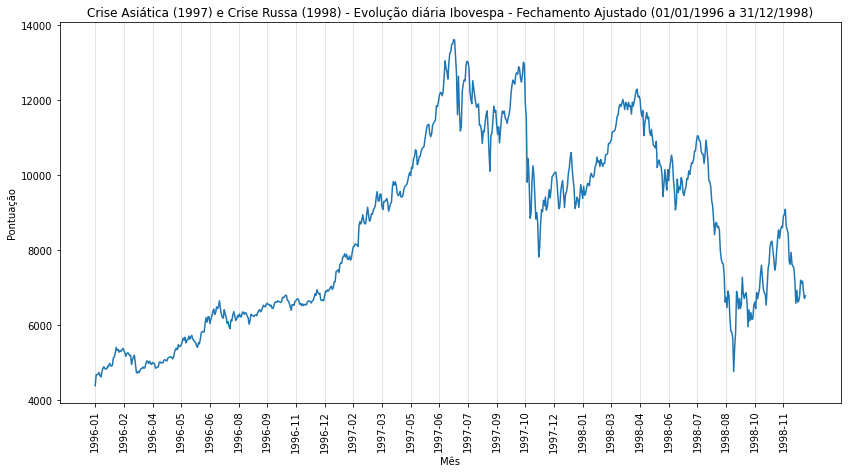

In [62]:
# Visão de 01/01/1996 a 31/12/1998
ax = ibovespa["Adj Close"].loc["1996-01-01":"1998-12-31"].plot(figsize=(14,7));
plt.title("Crise Asiática (1997) e Crise Russa (1998) - Evolução diária Ibovespa - Fechamento Ajustado (01/01/1996 a 31/12/1998)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.loc["1996-01-01":"1998-12-31"].index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)

In [63]:
ibovespa.loc["1995-06-01":"1998-12-31"].index.str[:7]

Index(['1995-06', '1995-06', '1995-06', '1995-06', '1995-06', '1995-06',
       '1995-06', '1995-06', '1995-06', '1995-06',
       ...
       '1998-12', '1998-12', '1998-12', '1998-12', '1998-12', '1998-12',
       '1998-12', '1998-12', '1998-12', '1998-12'],
      dtype='object', name='Date', length=890)

## A crise da desvalorização do real em 1999
Notícias da época:

*   https://wp.ufpel.edu.br/ppgom/files/2017/06/monicaremde.pdf
*   https://pt.wikipedia.org/wiki/Desvaloriza%C3%A7%C3%A3o_do_real_em_1999#:~:text=A%20crise%20da%20desvaloriza%C3%A7%C3%A3o%20do,em%20regime%20de%20c%C3%A2mbio%20flutuante.

"A crise da desvalorização do real em 1999, ou efeito samba, foi um forte movimento de queda do real que ocorreu no Brasil em janeiro de 1999, quando o Banco Central abandonou o regime de Bandas Cambiais, passando a operar em regime de câmbio flutuante."

"O Plano Real foi bem sucedido em controlar a inflação ainda em 1994. Entretanto, a implementação de políticas econômicas deflacionistas (juros elevados, baixo investimento estatal), associadas a um câmbio semi-fixo sobrevalorizado, gerou, ao longo dos anos, um grave acúmulo de problemas econômicos estruturais."

"Para manter este sistema funcionando por mais tempo foi necessário injetar algumas dezenas de bilhões de dólares na manutenção do câmbio semi-fixo e das altas taxas de juros."

" Por fim, mesmo com o cortes de despesas públicas e o aumento da carga tributária, que possibilitaram superávits primários, a dívida externa e a dívida pública continuaram a crescer. [4]
A Crise asiática de 1997, seguida da Crise russa de 1998 apenas aceleram as tendências, já que provocaram uma brusca queda no preço das commodities exportadas pelo Brasil e reduziram o crédito externo, dificultando a captação de dólares no exterior. Isto inviabilizou a manutenção de um câmbio sobrevalorizado como era o brasileiro até então. Os recursos obtidos internamente, com as privatizações, não eram mais suficientes e os juros elevados além de inviabilizar o crescimento interno, não atraíam mais capitais internacionais. O choque de preços no exterior fez esse desequilíbrio se tornar ainda maior.[5] Após as eleições de 1998, o governo brasileiro iniciou os preparativos para a desvalorização da moeda doméstica, que ocorreria na segunda quinzena de janeiro de 1999."

"Foram muitas as consequências da desvalorização do Real em 1999, algumas positivas outras negativas. A primeira consequência positiva foi o fim do incessante escoamento de dólares das contas externas brasileiras, gastos para manter o real sobrevalorizado. Associado a isto, o Brasil teve uma redução do déficit na balança de pagamentos e o crescimento da dívida pública foi controlado. Entretanto, a carga tributária cresceu entre 1999 e 2002, passando da faixa de 25% para 37%.[7]

Dentre as consequências políticas, destaca-se o início da crise política do governo Fernando Henrique Cardoso que sustentava o discurso da estabilidade econômica na estabilidade do Real.[1]

Houve uma série de consequências econômicas, como o aumento da inflação (o IGP-M passou de 1,79% em 1998 para 20,10% em 1999), a redução do deficit da balança comercial (de US 6,5 bilhões em 1998 para US 1,2 bilhão em 1999 e US$ 0,7 bilhão em 2000). Alem disto, houve uma redução dos juros, de 41% ao ano em janeiro de 1999 para 19% em dezembro de 1999."

"Entretanto, a desvalorização aumentou as receitas para a maior parte dos setores produtivos e exportadores do Brasil, tanto na agricultura, pecuária e extrativismo como nos setores industriais. Além de facilitar as exportações, a redução das importações ajudou a reaquecer a indústria nacional. Assim, diferentemente de outras crises dos anos 1990, a desvalorização do Real em 1999 acabou se mostrando, no prazo de alguns anos, positiva para a economia brasileira."

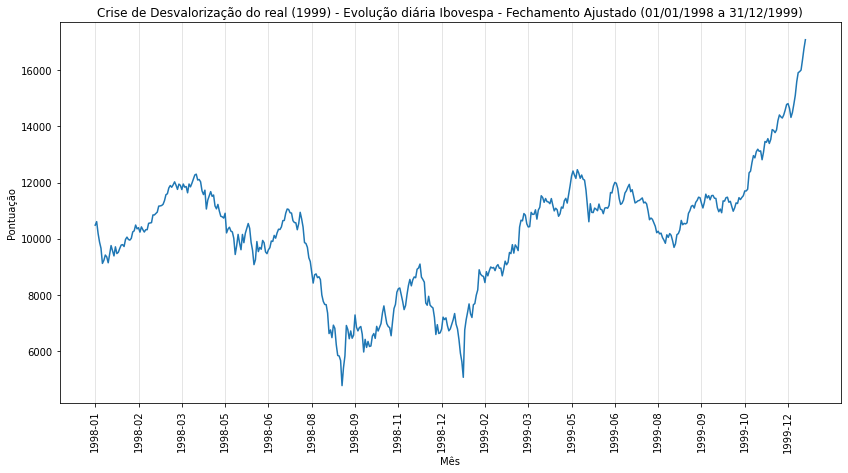

In [64]:
# Visão de 01/01/1998 a 31/12/1999
ax = ibovespa["Adj Close"].loc["1998-01-01":"1999-12-31"].plot(figsize=(14,7));
plt.title("Crise de Desvalorização do real (1999) - Evolução diária Ibovespa - Fechamento Ajustado (01/01/1998 a 31/12/1999)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.loc["1998-01-01":"1999-12-31"].index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)

## 2000: Bolha "ponto com"

Notícias da época:

*   https://www.infomoney.com.br/mercados/ha-13-anos-bolha-da-internet-comecava-a-explodir-nos-eua-veja-como-foi/

"A formação da bolha das empresas de informática se deu entre os anos de 1995 e 2000."

"De acordo com muitos especialistas de mercado, a corrupção corporativa foi um dos principais motivos para o acidente ocorrer, uma vez que muitas empresas envolveram-se em fraudes, com falhas graves e dívidas “maquiadas” no balanço."

"Entre outros fatores apontados para o estouro da bolha, estiveram ainda os altos gastos para a transição para a virada do milênio: uma vez que as empresas já possuiam os equipamentos necessários, elas pararam de gastar com eles. Por fim, tiveram também os maus resultados das varejistas online na temporada de Natal de 1999 e que foram divulgados somente em março, apontando que muitos cases não eram tão atrativos quanto mostrados inicialmente. 

Assim, após fechar a 5.048,62 pontos no dia 10 de março, a bolsa eletrônica não parou mais de cair, mesmo que aos poucos. Naquela sessão, ela registrou queda de 4% e, desde então, chegou a perder 75% do valor até o final de 2000."

"O clímax – e a posterior queda – deste período se deu no dia 10 de março de 2000, quando o índice Nasdaq – a bolsa eletrônica dos EUA – chegou a 5.132,52 pontos, sua máxima histórica."

*   https://pt.wikipedia.org/wiki/Bolha_da_Internet#:~:text=O%20estouro%20da%20bolha%20das,valor%20em%20apenas%20um%20ano.

"A bolha da Internet ou bolha das empresas ponto com[1] foi uma bolha especulativa que ocorreu aproximadamente de 1994 até 2000, caracterizada por uma forte alta das ações das novas empresas de tecnologia da informação e comunicação (TIC) baseadas na Internet."

"O estouro da bolha das "ponto com", deu-se em 10 de março de 2000, quando o índice de tecnologia pesada Nasdaq Composite chegou a 5,048.62 (intra-dia 5,132.52), mais que o dobro do seu valor em apenas um ano."

*   https://www.sunoresearch.com.br/artigos/bolha-da-internet/
*   https://www.tecmundo.com.br/mercado/124475-historia-estouro-bolha-da-internet-ano-2000-video.htm

**2001-2002: Crise econômica da Argentina:**
*   https://pt.wikipedia.org/wiki/Crise_econ%C3%B4mica_argentina_(1998-2002)

"A crise econômica argentina foi uma crise financeira que afetou a economia argentina durante a década de 1990 e início da década de 2000. Macroeconomicamente falando, o período crítico começou com a queda do PIB real em 1999 e terminou em 2002 com o retorno do crescimento do PIB, mas as origens do colapso da economia argentina e seus efeitos sobre a população, podem ser encontradas em ações anteriores."
*   https://pt.wikipedia.org/wiki/Desvaloriza%C3%A7%C3%A3o_do_real_em_1999#:~:text=A%20crise%20da%20desvaloriza%C3%A7%C3%A3o%20do,em%20regime%20de%20c%C3%A2mbio%20flutuante

"Este processo, ao longo do período 1999-2000 agravou a situação das contas externas argentinas, e acelerou a pressão pela desvalorização cambial e a desdolarização da economia argentina. As opções discutidas na Argentina, à época, eram basicamente: desvalorizar o câmbio ou deixar o Mercosul. A crise econômica global de 2000-2001, marcada pela falência da Enron e a crise na bolsa de valores da Nasdaq nos EUA, agravou a situação da Argentina, que foi obrigada a desvalorizar o câmbio em 2001. A Crise econômica da Argentina foi considerada por muitos analistas um teste de fogo para o Mercosul."

**2000-2001: Crise turca:**
*   https://www1.folha.uol.com.br/fsp/dinheiro/fi2911200026.htm

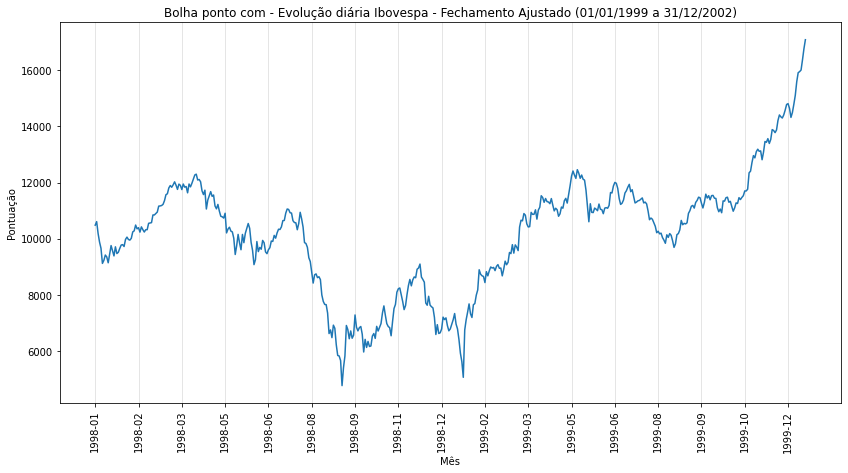

In [65]:
# Visão de 01/01/1999 a 31/12/2002
ax = ibovespa["Adj Close"].loc["1998-01-01":"1999-12-31"].plot(figsize=(14,7));
plt.title("Bolha ponto com - Evolução diária Ibovespa - Fechamento Ajustado (01/01/1999 a 31/12/2002)");
plt.xlabel("Mês");
plt.ylabel("Pontuação");

# remove os dias e mese no label deixando somente ano
labels = ibovespa.loc["1998-01-01":"1999-12-31"].index.str[:7]

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30));
ax.set_xticklabels(labels[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 30)]);
plt.xticks(rotation=90);

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)